In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("insurance.csv")
print(dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [2]:
print(dataset.shape)

(1338, 7)


In [3]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
print(dataset['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64


In [5]:
print(dataset['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [6]:
print(dataset['region'].value_counts())

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [7]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
print(x)
print(y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False,drop='first',categories='auto'),[1,4,5])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7
0,0,1,0,0,1,19,27.9,0
1,1,0,0,1,0,18,33.77,1
2,1,0,0,1,0,28,33,3
3,1,0,1,0,0,33,22.705,0
4,1,0,1,0,0,32,28.88,0


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
pd.DataFrame(x).head() 

,0,1,2,3,4,5,6,7
0,-1.010519,1.970587,-0.566418,-0.611324,1.765481,-1.438764,-0.453320,-0.908614
1,0.989591,-0.507463,-0.566418,1.635795,-0.566418,-1.509965,0.509621,-0.078767
2,0.989591,-0.507463,-0.566418,1.635795,-0.566418,-0.797954,0.383307,1.580926
3,0.989591,-0.507463,1.765481,-0.611324,-0.566418,-0.441948,-1.305531,-0.908614
4,0.989591,-0.507463,1.765481,-0.611324,-0.566418,-0.513149,-0.292556,-0.908614


In [10]:
import plotly.express as px
from sklearn.decomposition import PCA
pca =PCA(n_components=4)
x=pca.fit_transform(x)
PVE=pca.explained_variance_ratio_
print(PVE)

[0.19216849 0.16586792 0.13701263 0.13277753]


In [15]:
total_var = PVE.sum() * 100
print(total_var)

62.7826571584163


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = reg.predict(x_test)
y_pred

array([14357.63462871,  9562.21490566, 27993.03878083, 15565.43319064,
        2489.52294517, 10667.5372186 ,  2983.39659852, 13133.65066834,
       11061.23376991, 18853.43751452,  8671.79125223,  8618.35978811,
        5855.80730586,  5521.03922448, 19836.8680261 , 13782.1863891 ,
       12339.11592599, 14927.6550846 , 16642.92925603, 20314.88517874,
       24589.40768041, 10647.20275527,  5787.04729244, 15322.36483443,
       15047.14712508, 16334.53919285,  1467.7691489 , 14353.0233398 ,
        5739.50606755, 17287.015189  , 10822.4488516 , 29086.12476862,
       14336.60987218, 13948.7574437 , 10264.34223272,  3974.18195268,
       21629.44233348, 22781.05622616, 17852.47848322,  3254.88911151,
        2464.2934812 , 14096.26415126, 20341.24217558, 27699.88219183,
       15845.39793107,  8563.45652221, 13707.68677987, 14018.51151567,
        4791.32470977,  8867.21193958,  5174.52573924,  9555.043626  ,
       21928.35050604, 21909.90442783, 10798.91167886, 13528.57769393,
      

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

104435297.37357266
8091.547208919449
10219.358951204946


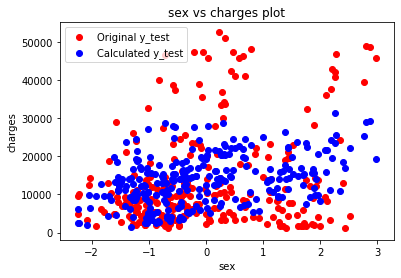

In [14]:
plt.scatter(x_test[:,0],y_test,c='red',label = 'Original y_test')
plt.scatter(x_test[:,0],y_pred,c='blue',label = 'Calculated y_test')
plt.xlabel('sex')
plt.ylabel('charges')
plt.title('sex vs charges plot')
plt.legend()
plt.show()

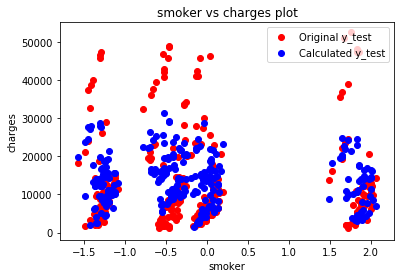

In [18]:
plt.scatter(x_test[:,1],y_test,c='red',label = 'Original y_test')
plt.scatter(x_test[:,1],y_pred,c='blue',label = 'Calculated y_test')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('smoker vs charges plot')
plt.legend()
plt.show()

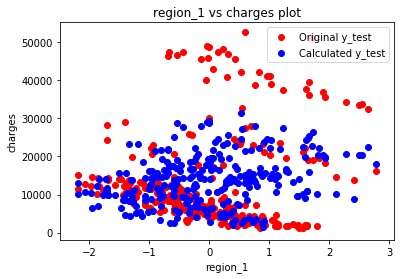

In [19]:
plt.scatter(x_test[:,2],y_test,c='red',label = 'Original y_test')
plt.scatter(x_test[:,2],y_pred,c='blue',label = 'Calculated y_test')
plt.xlabel('region_1')
plt.ylabel('charges')
plt.title('region_1 vs charges plot')
plt.legend()
plt.show()

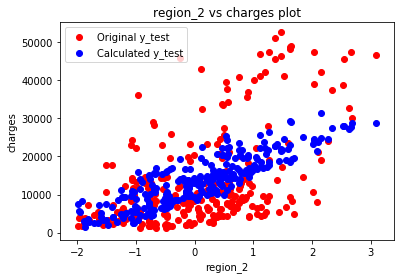

In [20]:
plt.scatter(x_test[:,3],y_test,c='red',label = 'Original y_test')
plt.scatter(x_test[:,3],y_pred,c='blue',label = 'Calculated y_test')
plt.xlabel('region_2')
plt.ylabel('charges')
plt.title('region_2 vs charges plot')
plt.legend()
plt.show()